In [1]:
%matplotlib inline

import os, sys
import inspect
import matplotlib.pyplot as plt
util_dir = os.path.dirname('../../util/')
sys.path.insert(0, util_dir) 
from bern_metrop import bern_metrop

**Exercise 7.2. [Purpose: To explore the autocorrelation function in Figure 7.12.]** At the end of the script `BernMetrop.R`, add these lines:

```
openGraph(height=7,width=3.5)
layout(matrix(1:2,nrow=2))
acf(acceptedTraj, lag.max=30, col='skyblue', lwd=3)
Len = length( acceptedTraj )
Lag = 10
trajHead = acceptedTraj[ 1.      : (Len-Lag) ]
trajTail = acceptedTraj[ (1+Lag) : Len       ]
plot(trajHead, trajTail, pch=".", col="skyblue",
     main=bquote( list( "Prpsl.SD" == .(proposalSD) ,
                        lag == .(Lag), 
                        cor == .(round(cor(trajHead,trajTail),3)))) )
```

**(A)** Before each lime, add a comment that explains what the line does. Include the commented code in your write-up.

In [2]:
with open('../../util/bern_metrop.py', 'r') as f:
    a = ''.join(f.readlines())

In [3]:
a = a + '''
  from statsmodels.tsa.stattools import acf
  from scipy.stats import pearsonr
  
  # Create a figure with two rows
  fig, ax = plt.subplots(2, 1)
    
  # Calculate the autcorrelation function between the trajectory and
  # itself for an increasing lag until 30 lag units
  autocorr = acf(accepted_traj, nlags = 30)
  # Plot the autocorrelation function values
  ax[0].bar(range(len(autocorr)), autocorr, color = 'C0')
  ax[0].set_xlabel('lag')
  ax[0].set_ylabel('acf')
  
  # Selecting the indexes to display the values of the trajectory
  # vs. the lagged values of the trajectory (10 units)
  length = len(accepted_traj)
  lag = 10
  traj_head = accepted_traj[0:length - lag]
  traj_tail = accepted_traj[lag: length]

  # Scatter plot itself
  ax[1].scatter(traj_head, traj_tail, marker = '.', color = 'C0')
  # Display the input parameters and the corresponding correlation between
  # the trajectory and the lagged trajectory
  ax[1].set_title('prpsl.SD = ' + \
                  str(proposal_sd) + \
                  ' lag = ' \
                  + str(lag) + \
                  ' cor = ' + 
                  str(round(pearsonr(traj_head, traj_tail)[0], 3)))
  
  plt.tight_layout()
  fig.set_figheight(8)
'''

In [4]:
exec(a)

**(B)** Repeat the previous exercise, with the lines above appended to the script. Include the resulting new graphs in your write-up. For each run, verify that the height of the ACF bar at the specified lag matches the correlation in the scatter plot. 

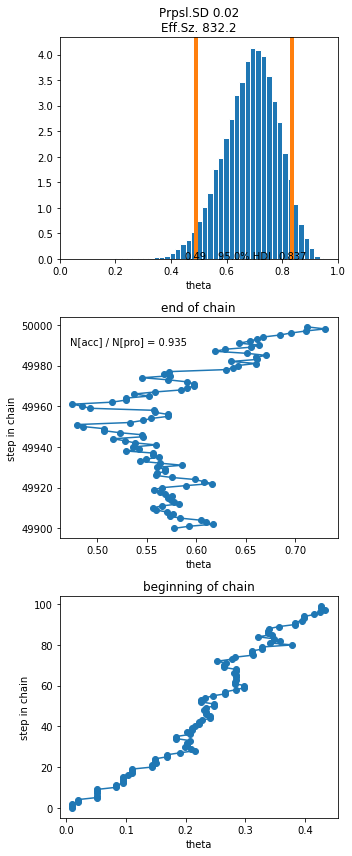

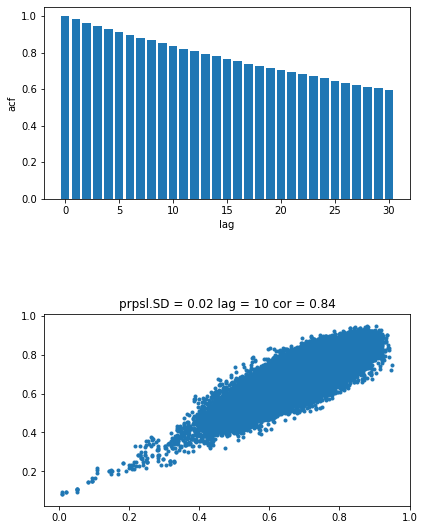

In [5]:
bern_metrop(0.02)

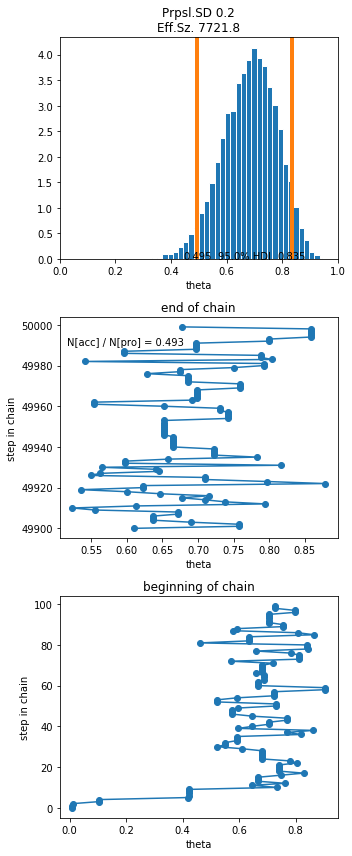

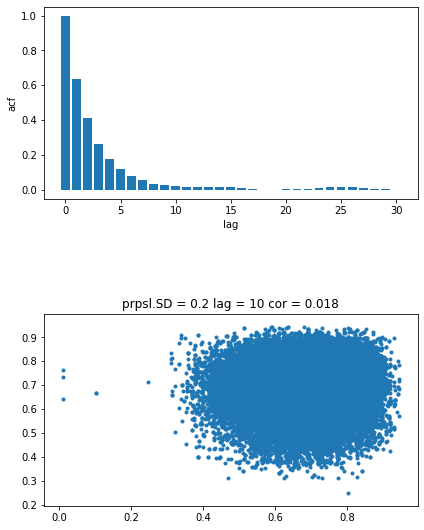

In [6]:
bern_metrop(0.2)

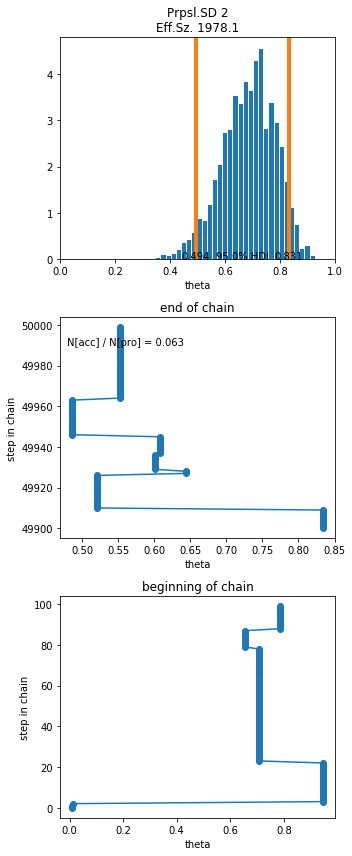

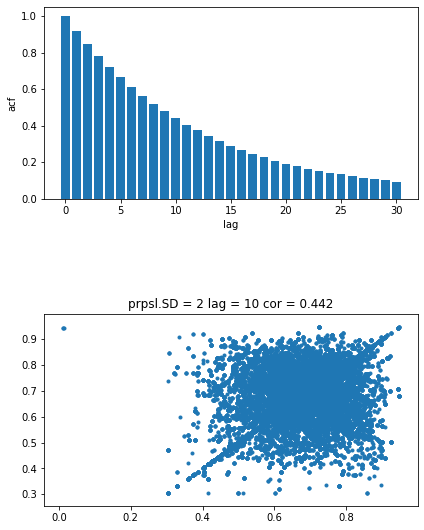

In [7]:
bern_metrop(2)

**(C)** When the proposal distribution has SD = 2, why does the scatter plot have a dense line of points in the diagonal? (*Hint:* look at the trajectory)

The proportion of rejected jumps is quite hight. Therefore, the trajectory remains quite stable most of the time, and it is more likely that after 10 iterations the random walker is at the same position it was. 